# Capitolo 2: La Minaccia in Italia (Trend e Settori)
Questo notebook analizza i dati forniti dall'Agenzia per la Cybersicurezza Nazionale (ACN) e da Check Point (2024-2026) per mappare lo stato della minaccia cyber in Italia, evidenziando il divario tra attacchi globali e impatto nazionale.

In [1]:
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
plt.rcParams['font.family'] = 'serif'

## 2.1 Confronto Eventi vs Incidenti (2024-2025)
In questa sezione analizziamo la discrepanza tra il numero di eventi anomali rilevati e gli incidenti effettivamente confermati.

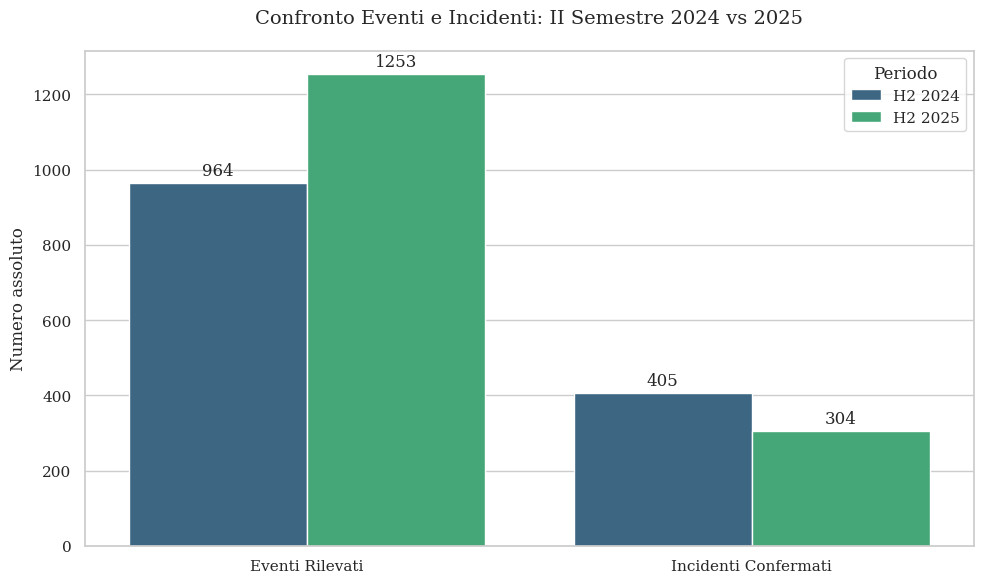

In [2]:
df_trend = pl.read_csv("../data/raw/eventi_incidenti_trend.csv")

plt.figure(figsize=(10, 6))
ax1 = sns.barplot(data=df_trend.to_pandas(), x="Metrica", y="Valore", hue="Periodo", palette="viridis")
for container in ax1.containers:
    ax1.bar_label(container, fmt='%.0f', padding=3)

plt.title("Confronto Eventi e Incidenti: II Semestre 2024 vs 2025", fontsize=14, pad=20)
plt.ylabel("Numero assoluto")
plt.xlabel("")
plt.tight_layout()
plt.savefig("figura_2_1_trend.png")
plt.show()
plt.close()

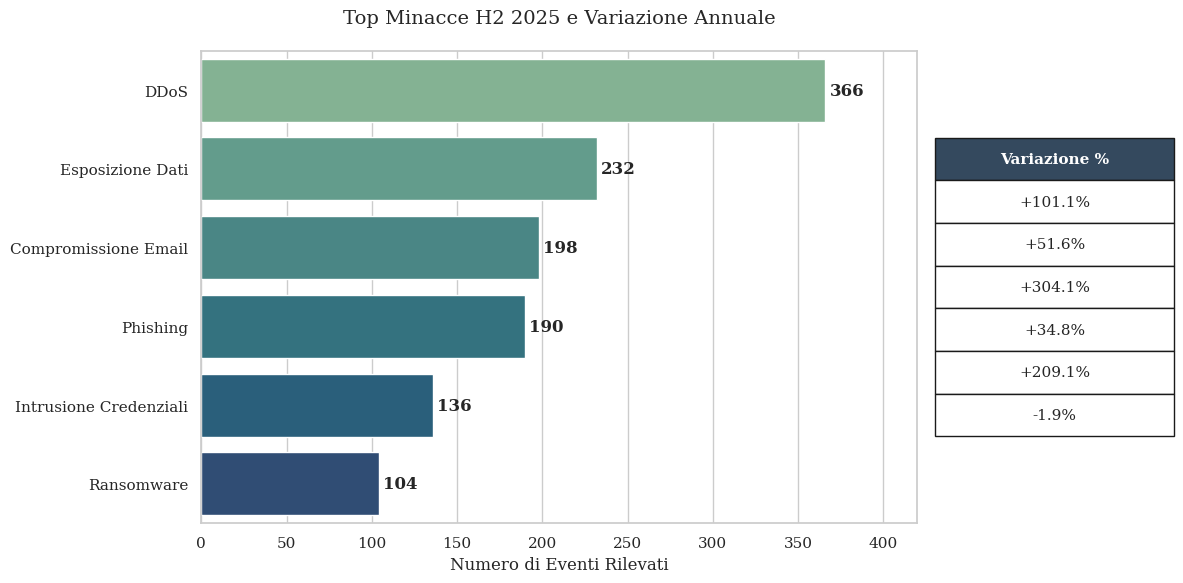

In [3]:
df_threats = (
    pl.read_csv("../data/raw/top_minacce_h2_2025.csv")
    .sort("H2 2025", descending=True)
)

fig, (ax_bar, ax_table) = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw={'width_ratios': [3, 1]})

sns.barplot(
    data=df_threats.to_pandas(),
    x="H2 2025",
    y="Minaccia",
    hue="Minaccia",
    palette="crest",
    ax=ax_bar
)

for container in ax_bar.containers:
    ax_bar.bar_label(container, fmt='%.0f', padding=3, fontweight='bold')

ax_bar.set_title("Top Minacce H2 2025 e Variazione Annuale", fontsize=14, pad=20)
ax_bar.set_xlabel("Numero di Eventi Rilevati")
ax_bar.set_ylabel("")
ax_bar.set_xlim(0, 420)

ax_table.axis('off')

table_data = []
for var in df_threats["Variazione %"].to_list():
    segno = "+" if var > 0 else ""
    table_data.append([f"{segno}{var}%"])

table = ax_table.table(
    cellText=table_data,
    colLabels=["Variazione %"],
    loc='center',
    cellLoc='center'
)

table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(1, 2.5)

for key, cell in table.get_celld().items():
    if key[0] == 0:
        cell.set_text_props(weight='bold', color='white')
        cell.set_facecolor('#34495e')

plt.tight_layout()

plt.savefig("figura_2_2_minacce.png")
plt.show()

## 2.2 Vittime per Settore e Vettori di Attacco
Come si distribuiscono gli attacchi riusciti? L'analisi evidenzia una pressione crescente sulle Pubbliche Amministrazioni locali e l'evoluzione dei vettori, con particolare attenzione alle compromissioni via email e DDoS.

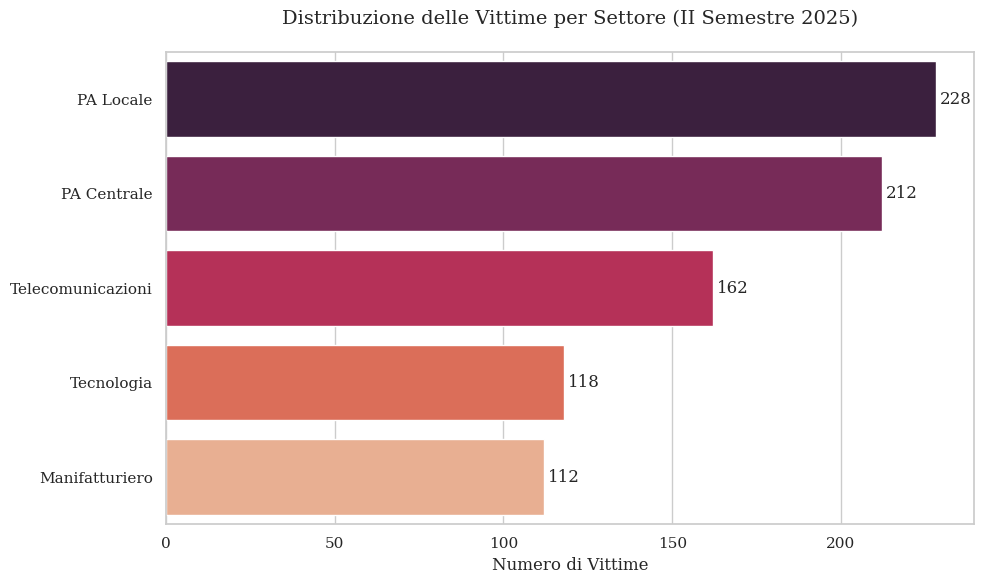

In [4]:
df_sector = (
    pl.read_csv("../data/raw/vittime_settore_h2_2025.csv")
    .sort("Vittime", descending=True)
)

plt.figure(figsize=(10, 6))

ax2 = sns.barplot(
    data=df_sector.to_pandas(),
    x="Vittime",
    y="Settore",
    hue="Settore",
    palette="rocket",
    legend=False
)

for container in ax2.containers:
    ax2.bar_label(container, fmt='%.0f', padding=3)

plt.title("Distribuzione delle Vittime per Settore (II Semestre 2025)", fontsize=14, pad=20)
plt.xlabel("Numero di Vittime")
plt.ylabel("")
plt.tight_layout()
plt.savefig("figura_2_2_settori.png")
plt.show()

## 2.3 Evoluzione del Paradosso Italiano
Questa è la core-analysis del capitolo. Mettiamo in correlazione il peso economico/demografico dell'Italia (e del G7) con la percentuale di incidenti subiti, dimostrando visivamente l'eccesso di rischio (il "Paradosso").

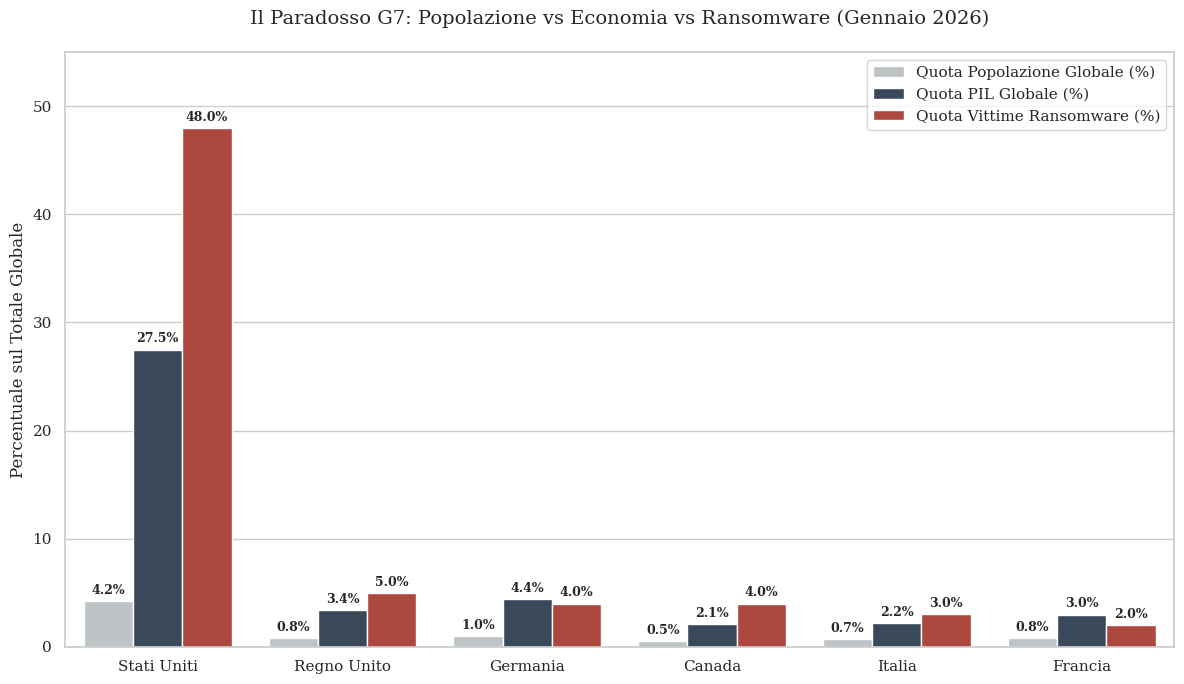

In [5]:
df_g7 = pl.read_csv("../data/raw/comparazione_paesi_g7_pil_pop_rans.csv")

df_melted = df_g7.unpivot(
    index="Country",
    on=["Quota Popolazione Globale (%)", "Quota PIL Globale (%)", "Quota Vittime Ransomware (%)"],
    variable_name="Metrica",
    value_name="Percentuale"
)

plt.figure(figsize=(12, 7))

palette_custom = {
    "Quota Popolazione Globale (%)": "#bdc3c7",
    "Quota PIL Globale (%)": "#34495e",
    "Quota Vittime Ransomware (%)": "#c0392b"
}

ax = sns.barplot(
    data=df_melted.to_pandas(),
    x="Country",
    y="Percentuale",
    hue="Metrica",
    palette=palette_custom
)

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', padding=3, fontsize=9, fontweight='bold')

plt.title("Il Paradosso G7: Popolazione vs Economia vs Ransomware (Gennaio 2026)", fontsize=14, pad=20)
plt.ylabel("Percentuale sul Totale Globale")
plt.xlabel("")
plt.legend(title="", loc='upper right')
plt.ylim(0, 55)
plt.tight_layout()
plt.savefig("figura_2_3_g7_pop_pil_ransom.png")
plt.show()